 #### Mount Google Drive

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Set Path

In [2]:

path="https://drive.google.com/drive/u/0/folders/1yZoHkPThLoQavKnIXyfSJcwe5QtkOpYf"


#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Activation

#### Accessing Dataset from Local Directory

In [4]:
# Get the working directory path
import os
current_dir = os.getcwd()
# Import mnist data stored in the following path: current directory -> mnist.npz
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=current_dir+'/mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


#### Data Shape

In [5]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


#### Data Distribution

In [6]:
#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= np.unique(Y_train, return_counts=True)
print("The number of occuranc of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occuranc of each class in the dataset = {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}  



<BarContainer object of 10 artists>

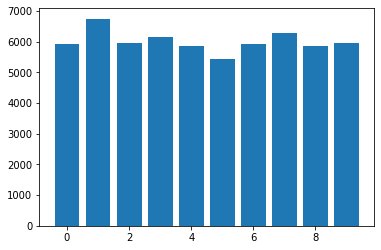

In [7]:
a_dictionary = dict (zip(unique, count) )
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.bar(keys, values)

#### Normalization of Dataset

In [8]:
# Normalizing in the interval [-0.5, 0.5]
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

In [9]:
X_org=X_train
Y_org=Y_train

#### Plotting some samples of the Training Data

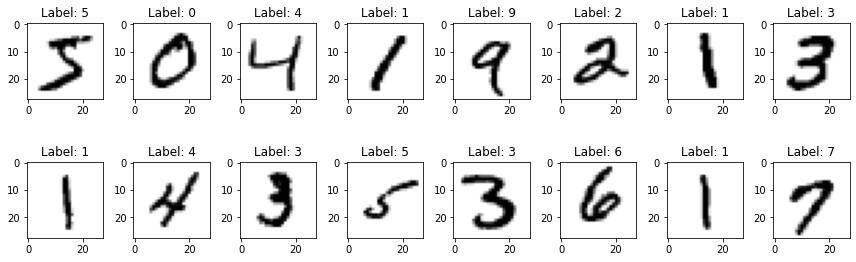

In [10]:
# import matplotlib's pyplot library to visualize MNIST images
import matplotlib.pyplot as plt
%matplotlib inline
# define number of images to show
num_row = 2
num_col = 8
num= num_row*num_col
# get images
images = X_train[0:num]
labels = Y_train[0:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes[i//num_col, i%num_col]
     ax.imshow(images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#### Pre-Augmentation 

BEFORE:



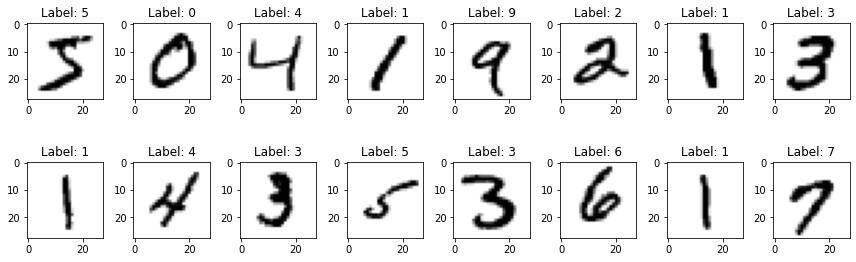

In [11]:
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

#### Model Designing

In [12]:
K.set_image_data_format('channels_last')
np.random.seed(0)

In [13]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 100)       1000      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 100)       400       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 16900)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1690100   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,692,510
Trainable params: 1,692,310
Non-trainable params: 200
____________________________________________

#### Encoding Target Feature

In [15]:
Y_train = np_utils.to_categorical(Y_train).astype('int32')
Y_test = np_utils.to_categorical(Y_test)

In [16]:
from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

#### Data Augmentation and Training Phase

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

from keras.preprocessing.image import ImageDataGenerator
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25

# create the class object
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split = 0.2
)
# compute quantities required for featurewise normalization
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(X_train,Y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(X_train,Y_train, batch_size=60, subset='validation')


# fits the model on batches with real-time data augmentation:
history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 300,
                    workers=-1,callbacks=[callbacks])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
13/13 [==============================] - 31s 87ms/step - loss: 4.0221 - accuracy: 0.1950 - val_loss: 2.2538 - val_accuracy: 0.2917
Epoch 2/300
13/13 [==============================] - 1s 46ms/step - loss: 2.0464 - accuracy: 0.2869 - val_loss: 2.2506 - val_accuracy: 0.2500
Epoch 3/300
13/13 [==============================] - 1s 47ms/step - loss: 1.8497 - accuracy: 0.3620 - val_loss: 2.1868 - val_accuracy: 0.3167
Epoch 4/300
13/13 [==============================] - 1s 46ms/step - loss: 1.6665 - accuracy: 0.4546 - val_loss: 2.1223 - val_accuracy: 0.4833
Epoch 5/300
13/13 [==============================] - 1s 46ms/step - loss: 1.4981 - accuracy: 0.4939 - val_loss: 2.0808 - val_accuracy: 0.4750
Epoch 6/300
13/13 [==============================] - 1s 45ms/step - loss: 1.3175 - accuracy: 0.5452 - val_loss: 2.0027 - val_accuracy: 0.5583
Epoch 7/300
13/13 [==============================] - 1s 45ms/step - loss: 1.1069 - accuracy: 0.6412 - val_loss: 1.9650 - val_accuracy: 0.6000
Epoch

Training the Model with Actual Data

In [18]:
model.fit(X_train,Y_train, epochs=10, batch_size=2000, verbose=1,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 5s 172ms/step - loss: 0.2991 - accuracy: 0.9234 - val_loss: 1.8094 - val_accuracy: 0.5549
Epoch 2/10
24/24 [==============================] - 4s 164ms/step - loss: 0.1051 - accuracy: 0.9692 - val_loss: 0.6767 - val_accuracy: 0.8020
Epoch 3/10
24/24 [==============================] - 4s 164ms/step - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.2613 - val_accuracy: 0.9207
Epoch 4/10
24/24 [==============================] - 4s 163ms/step - loss: 0.0671 - accuracy: 0.9807 - val_loss: 0.2079 - val_accuracy: 0.9367
Epoch 5/10
24/24 [==============================] - 4s 163ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 6/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0522 - accuracy: 0.9855 - val_loss: 0.1227 - val_accuracy: 0.9628
Epoch 7/10
24/24 [==============================] - 4s 163ms/step - loss: 0.0471 - accuracy: 0.9871 - val_loss: 0.0888 - val_accuracy: 0.9727
Epoch 

#### Result Visualization

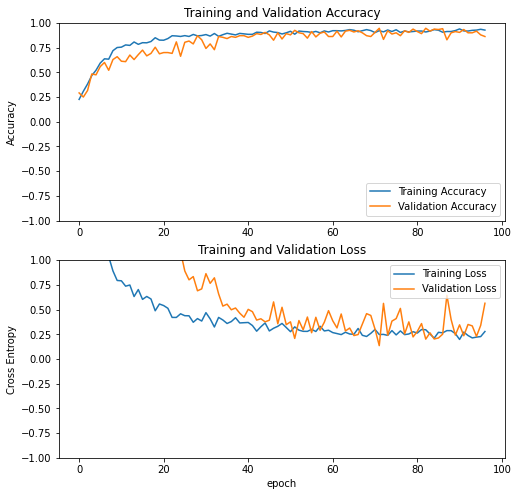

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Model Performance

In [20]:
# model.fit(X_train, y_train, epochs= 32 , batch_size=200, validation_split = 0.2)
scores = model.evaluate(X_test, Y_test, verbose = 10 )
print ( scores )

[0.05956447124481201, 0.9811999797821045]


#### Accuracy

In [21]:
# evaluate the model
_,train_acc =model.evaluate(X_train,Y_train,verbose=0)
_,test_acc  =model.evaluate(X_test,Y_test, verbose=0)
print('Training Accuracy :',train_acc)
print('Testing Accuracy :',test_acc)

Training Accuracy : 0.9851166605949402
Testing Accuracy : 0.9811999797821045


In [22]:
# predict classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
yhat_classes=list(yhat_classes)
#yhat_classes

In [24]:
class_labels = np.argmax(Y_test, axis=1) 

In [25]:
test_label=class_labels.tolist()

#### Classification Report

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
target_names=[0,1,2,3,4,5,6,7,8,9]
print(classification_report(test_label, yhat_classes, target_names))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Confusion Matrix


In [28]:
cm = confusion_matrix(test_label, yhat_classes) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 968    0    7    0    2    0    1    1    1    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   1    1 1020    2    3    0    0    5    0    0]
 [   0    1    3  999    0    4    0    2    1    0]
 [   0    1    0    0  980    0    0    1    0    0]
 [   2    1    0    5    0  883    1    0    0    0]
 [   3    6    0    1    9    8  929    0    2    0]
 [   0    3    9    2    0    1    0 1013    0    0]
 [   4    1    8    7    2    3    1    5  938    5]
 [   5    4    1    6   19    5    0   18    1  950]]
